<a href="https://colab.research.google.com/github/Shafqatsarwar/Google_colab_langchain_gemini/blob/main/1st_langgraph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Assistant


In [1]:
%pip install --quiet -U langgraph langchain langchain_openai langchain_community langchain_core tavily-python wikipedia
# %pip install -q -U langchain-google-genai
%pip install httpx==0.27.2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.0
    Uninstalling httpx-0.28.0:
      Successfully uninstalled httpx-0.28.0


# Set up

we will use chain langsmith for tracing

In [10]:
import os, getpass

def _set_env(var: str):
    # Check if the variable is set in the OS environment
    env_value = os.environ.get(var)
    if not env_value:
        # If not set, prompt the user for input
        env_value = getpass.getpass(f"{var}: ")

    # Set the environment variable for the current process
    os.environ[var] = env_value

_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

In [ ]:
# # from langchain_openai import ChatOpenAI
# from langchain-google-genai import ChatGoogleGenerativeAI
# llm = Go(model="gpt-4o", temperature=0)

In [ ]:

# # Importing userdata from Google Colab and API keys:
# from google.colab import userdata
# google_api_key = userdata.get('GEMINI_API_KEY')


In [ ]:
# # Import the ChatGoogleGenerativeAI class from the langchain:
# from langchain_google_genai import ChatGoogleGenerativeAI
# # Import the AIMessage:
# from langchain_core.messages.ai import AIMessage


In [ ]:
# # LLM:
# llm = ChatGoogleGenerativeAI(
#     model="gemini-1.5-flash",  # Specify the model to use
#     api_key=google_api_key,     # Use the google_api_key variable here
#     temperature=0.2,            # Set the randomness of the model's responses (0 = deterministic, 1 = very random)
# )


In [ ]:
print(llm)

model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') temperature=0.2 client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7b9f34eedc60> default_metadata=()


In [13]:
from langchain_openai import ChatOpenAI
# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# Visibility into Trustcall updates
Trustcall creates and updates JSON schemas.

What if we want visibility into the specific changes made by Trustcall?

For example, we saw before that Trustcall has some of its own tools to:

Self-correct from validation failures
Update existing documents
Visibility into these tools can be useful for the agent we're going to build.

Below, we'll show how to do this!

In [11]:
from pydantic import BaseModel, Field

class Memory(BaseModel):
    content: str = Field(description="The main content of the memory. For example: User expressed interest in learning about Arabic.")

class MemoryCollection(BaseModel):
    memories: list[Memory] = Field(description="A list of memories about the user.")

We can add a listener to the Trustcall extractor.

This will pass runs from the extractor's execution to a class, Spy, that we will define.

Our Spy class will extract information about what tool calls were made by Trustcall.

In [16]:
!pip install trustcall
from trustcall import create_extractor
from trustcall import create_extractor

# Inspect the tool calls made by Trustcall
class Spy:
    def __init__(self):
        self.called_tools = []

    def __call__(self, run):
        # Collect information about the tool calls made by the extractor.
        q = [run]
        while q:
            r = q.pop()
            if r.child_runs:
                q.extend(r.child_runs)
            if r.run_type == "chat_model":
                self.called_tools.append(
                    r.outputs["generations"][0][0]["message"]["kwargs"]["tool_calls"]
                )

# Initialize the spy
spy = Spy()

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# Create the extractor
trustcall_extractor = create_extractor(
    model,
    tools=[Memory],
    tool_choice="Memory",
    enable_inserts=True,
)

# Add the spy as a listener
trustcall_extractor_see_all_tool_calls = trustcall_extractor.with_listeners(on_end=spy)

Generat Analyst: Human-in-the-loop

In [18]:
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

# Instruction
instruction = """Extract memories from the following conversation:"""

# Conversation
conversation = [HumanMessage(content="Hi, I'm Khan."),
                AIMessage(content="Nice to meet you, Khan."),
                HumanMessage(content="This morning I had a nice bike ride in Lahore.")]

# Invoke the extractor
result = trustcall_extractor.invoke({"messages": [SystemMessage(content=instruction)] + conversation})

In [19]:
# Messages contain the tool calls
for m in result["messages"]:
    m.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  Memory (call_AkkYZB0mMlkPt9K1wAoXmqbV)
 Call ID: call_AkkYZB0mMlkPt9K1wAoXmqbV
  Args:
    content: Khan had a nice bike ride in Lahore this morning.


In [20]:
# Responses contain the memories that adhere to the schema
for m in result["responses"]:
    print(m)

content='Khan had a nice bike ride in Lahore this morning.'


In [21]:
# Metadata contains the tool call
for m in result["response_metadata"]:
    print(m)

{'id': 'call_AkkYZB0mMlkPt9K1wAoXmqbV'}


In [22]:
# Update the conversation
updated_conversation = [AIMessage(content="That's great, did you do after?"),
                        HumanMessage(content="I went to Gulberg."),
                        AIMessage(content="What else is on your mind?"),
                        HumanMessage(content="I was thinking about Multan, and going back this winter!"),]

# Update the instruction
system_msg = """Update existing memories and create new ones based on the following conversation:"""

# We'll save existing memories, giving them an ID, key (tool name), and value
tool_name = "Memory"
existing_memories = [(str(i), tool_name, memory.model_dump()) for i, memory in enumerate(result["responses"])] if result["responses"] else None
existing_memories

[('0',
  'Memory',
  {'content': 'Khan had a nice bike ride in Lahore this morning.'})]

In [23]:
# Invoke the extractor with our updated conversation and existing memories
result = trustcall_extractor_see_all_tool_calls.invoke({"messages": updated_conversation,
                                                        "existing": existing_memories})

In [24]:
# Metadata contains the tool call
for m in result["response_metadata"]:
    print(m)

{'id': 'call_OE103dUdH9BLC7tYOJLZsMB9', 'json_doc_id': '0'}


In [25]:
# Messages contain the tool calls
for m in result["messages"]:
    m.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  Memory (call_OE103dUdH9BLC7tYOJLZsMB9)
 Call ID: call_OE103dUdH9BLC7tYOJLZsMB9
  Args:
    content: Khan had a nice bike ride in Lahore this morning. Then, he went to Gulberg. He was also thinking about Multan and going back this winter!


In [26]:
# Parsed responses
for m in result["responses"]:
    print(m)

content='Khan had a nice bike ride in Lahore this morning. Then, he went to Gulberg. He was also thinking about Multan and going back this winter!'


In [27]:
# Inspect the tool calls made by Trustcall
spy.called_tools

[[{'name': 'PatchDoc',
   'args': {'json_doc_id': '0',
    'planned_edits': "1. Replace the existing content with the updated memory that includes the user's activities and thoughts. The new content should reflect the bike ride in Lahore, the visit to Gulberg, and thoughts about going to Multan this winter.",
    'patches': [{'op': 'replace',
      'path': '/content',
      'value': 'Khan had a nice bike ride in Lahore this morning. Then, he went to Gulberg. He was also thinking about Multan and going back this winter!'}]},
   'id': 'call_OE103dUdH9BLC7tYOJLZsMB9',
   'type': 'tool_call'}]]

In [28]:
def extract_tool_info(tool_calls, schema_name="Memory"):
    """Extract information from tool calls for both patches and new memories.

    Args:
        tool_calls: List of tool calls from the model
        schema_name: Name of the schema tool (e.g., "Memory", "WishList", "Profile")
    """

    # Initialize list of changes
    changes = []

    for call_group in tool_calls:
        for call in call_group:
            if call['name'] == 'PatchDoc':
                changes.append({
                    'type': 'update',
                    'doc_id': call['args']['json_doc_id'],
                    'planned_edits': call['args']['planned_edits'],
                    'value': call['args']['patches'][0]['value']
                })
            elif call['name'] == schema_name:
                changes.append({
                    'type': 'new',
                    'value': call['args']
                })

    # Format results as a single string
    result_parts = []
    for change in changes:
        if change['type'] == 'update':
            result_parts.append(
                f"Document {change['doc_id']} updated:\n"
                f"Plan: {change['planned_edits']}\n"
                f"Added content: {change['value']}"
            )
        else:
            result_parts.append(
                f"New {schema_name} created:\n"
                f"Content: {change['value']}"
            )

    return "\n\n".join(result_parts)

# Inspect spy.called_tools to see exactly what happened during the extraction
schema_name = "Memory"
changes = extract_tool_info(spy.called_tools, schema_name)
print(changes)

Document 0 updated:
Plan: 1. Replace the existing content with the updated memory that includes the user's activities and thoughts. The new content should reflect the bike ride in Lahore, the visit to Gulberg, and thoughts about going to Multan this winter.
Added content: Khan had a nice bike ride in Lahore this morning. Then, he went to Gulberg. He was also thinking about Multan and going back this winter!


# Creating an agent

There are many different architectures to choose from.

Here, we'll implement something simple, a React agent.

This agent will be a helpful companion for creating and managing a WishList list.

This agent can make a decision to update three types of long-term memory:

(a) Create or update a user `profile` with general user information

(b) Add or update items in a WishList list `collection`

(c) Update its own `instructions` on how to update items to the WishList list

In [29]:
from typing import TypedDict, Literal

# Update memory tool
class UpdateMemory(TypedDict):
    """ Decision on what memory type to update """
    update_type: Literal['user', 'wishlist', 'instructions']

In [30]:
_set_env("OPENAI_API_KEY")

# Graph definition
We add a simple router, route_message, that makes a binary decision to save memories.

The memory collection updating is handled by Trustcall in the write_memory node, as before!

In [33]:
import uuid
from IPython.display import Image, display

from datetime import datetime
from trustcall import create_extractor
from typing import Optional
from pydantic import BaseModel, Field

from langchain_core.runnables import RunnableConfig
from langchain_core.messages import merge_message_runs, HumanMessage, SystemMessage

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, MessagesState, END, START
from langgraph.store.base import BaseStore
from langgraph.store.memory import InMemoryStore

from langchain_openai import ChatOpenAI

# Initialize the model
model = ChatOpenAI(model="gpt-4o", temperature=0)

# User profile schema
class Profile(BaseModel):
    """This is the profile of the user you are chatting with"""
    name: Optional[str] = Field(description="The user's name", default=None)
    location: Optional[str] = Field(description="The user's location", default=None)
    job: Optional[str] = Field(description="The user's job", default=None)
    connections: list[str] = Field(
        description="Personal connection of the user, such as family members, friends, or coworkers",
        default_factory=list
    )
    interests: list[str] = Field(
        description="Interests that the user has",
        default_factory=list
    )

# WishList schema
class WishList(BaseModel):
    task: str = Field(description="The task to be completed.")
    time_to_complete: Optional[int] = Field(description="Estimated time to complete the task (minutes).")
    deadline: Optional[datetime] = Field(
        description="When the task needs to be completed by (if applicable)",
        default=None
    )
    solutions: list[str] = Field(
        description="List of specific, actionable solutions (e.g., specific ideas, service providers, or concrete options relevant to completing the task)",
        min_items=1,
        default_factory=list
    )
    status: Literal["not started", "in progress", "done", "archived"] = Field(
        description="Current status of the task",
        default="not started"
    )

# Create the Trustcall extractor for updating the user profile
profile_extractor = create_extractor(
    model,
    tools=[Profile],
    tool_choice="Profile",
)

# Chatbot instruction for choosing what to update and what tools to call
MODEL_SYSTEM_MESSAGE = """You are a helpful chatbot.

You are designed to be a companion to a user, helping them keep track of their WishList list.

You have a long term memory which keeps track of three things:
1. The user's profile (general information about them)
2. The user's WishList list
3. General instructions for updating the WishList list

Here is the current User Profile (may be empty if no information has been collected yet):
<user_profile>
{user_profile}
</user_profile>

Here is the current WishList List (may be empty if no tasks have been added yet):
<wishlist>
{wishlist}
</wishlist>

Here are the current user-specified preferences for updating the WishList list (may be empty if no preferences have been specified yet):
<instructions>
{instructions}
</instructions>

Here are your instructions for reasoning about the user's messages:

1. Reason carefully about the user's messages as presented below.

2. Decide whether any of the your long-term memory should be updated:
- If personal information was provided about the user, update the user's profile by calling UpdateMemory tool with type `user`
- If tasks are mentioned, update the WishList list by calling UpdateMemory tool with type `wishlist`
- If the user has specified preferences for how to update the WishList list, update the instructions by calling UpdateMemory tool with type `instructions`

3. Tell the user that you have updated your memory, if appropriate:
- Do not tell the user you have updated the user's profile
- Tell the user them when you update the wishlist list
- Do not tell the user that you have updated instructions

4. Err on the side of updating the wishlist list. No need to ask for explicit permission.

5. Respond naturally to user user after a tool call was made to save memories, or if no tool call was made."""

# Trustcall instruction
TRUSTCALL_INSTRUCTION = """Reflect on following interaction.

Use the provided tools to retain any necessary memories about the user.

Use parallel tool calling to handle updates and insertions simultaneously.

System Time: {time}"""

# Instructions for updating the WishList list
CREATE_INSTRUCTIONS = """Reflect on the following interaction.

Based on this interaction, update your instructions for how to update WishList list items.

Use any feedback from the user to update how they like to have items added, etc.

Your current instructions are:

<current_instructions>
{current_instructions}
</current_instructions>"""

# Node definitions
def chat_mAIstro(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Load memories from the store and use them to personalize the chatbot's response."""

    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Retrieve profile memory from the store
    namespace = ("profile", user_id)
    memories = store.search(namespace)
    if memories:
        user_profile = memories[0].value
    else:
        user_profile = None

    # Retrieve task memory from the store
    namespace = ("wishlist", user_id)
    memories = store.search(namespace)
    wishlist = "\n".join(f"{mem.value}" for mem in memories)

    # Retrieve custom instructions
    namespace = ("instructions", user_id)
    memories = store.search(namespace)
    if memories:
        instructions = memories[0].value
    else:
        instructions = ""

    system_msg = MODEL_SYSTEM_MESSAGE.format(user_profile=user_profile, wishlist=wishlist, instructions=instructions)

    # Respond using memory as well as the chat history
    response = model.bind_tools([UpdateMemory], parallel_tool_calls=False).invoke([SystemMessage(content=system_msg)]+state["messages"])

    return {"messages": [response]}

def update_profile(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and update the memory collection."""

    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Define the namespace for the memories
    namespace = ("profile", user_id)

    # Retrieve the most recent memories for context
    existing_items = store.search(namespace)

    # Format the existing memories for the Trustcall extractor
    tool_name = "Profile"
    existing_memories = ([(existing_item.key, tool_name, existing_item.value)
                          for existing_item in existing_items]
                          if existing_items
                          else None
                        )

    # Merge the chat history and the instruction
    TRUSTCALL_INSTRUCTION_FORMATTED=TRUSTCALL_INSTRUCTION.format(time=datetime.now().isoformat())
    updated_messages=list(merge_message_runs(messages=[SystemMessage(content=TRUSTCALL_INSTRUCTION_FORMATTED)] + state["messages"][:-1]))

    # Invoke the extractor
    result = profile_extractor.invoke({"messages": updated_messages,
                                         "existing": existing_memories})

    # Save the memories from Trustcall to the store
    for r, rmeta in zip(result["responses"], result["response_metadata"]):
        store.put(namespace,
                  rmeta.get("json_doc_id", str(uuid.uuid4())),
                  r.model_dump(mode="json"),
            )
    tool_calls = state['messages'][-1].tool_calls
    return {"messages": [{"role": "tool", "content": "updated profile", "tool_call_id":tool_calls[0]['id']}]}

def update_wishlists(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and update the memory collection."""

    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    # Define the namespace for the memories
    namespace = ("wishlist", user_id)

    # Retrieve the most recent memories for context
    existing_items = store.search(namespace)

    # Format the existing memories for the Trustcall extractor
    tool_name = "WishList"
    existing_memories = ([(existing_item.key, tool_name, existing_item.value)
                          for existing_item in existing_items]
                          if existing_items
                          else None
                        )

    # Merge the chat history and the instruction
    TRUSTCALL_INSTRUCTION_FORMATTED=TRUSTCALL_INSTRUCTION.format(time=datetime.now().isoformat())
    updated_messages=list(merge_message_runs(messages=[SystemMessage(content=TRUSTCALL_INSTRUCTION_FORMATTED)] + state["messages"][:-1]))

    # Initialize the spy for visibility into the tool calls made by Trustcall
    spy = Spy()

    # Create the Trustcall extractor for updating the WishList list
    wishlist_extractor = create_extractor(
    model,
    tools=[WishList],
    tool_choice=tool_name,
    enable_inserts=True
    ).with_listeners(on_end=spy)

    # Invoke the extractor
    result = wishlist_extractor.invoke({"messages": updated_messages,
                                    "existing": existing_memories})

    # Save the memories from Trustcall to the store
    for r, rmeta in zip(result["responses"], result["response_metadata"]):
        store.put(namespace,
                  rmeta.get("json_doc_id", str(uuid.uuid4())),
                  r.model_dump(mode="json"),
            )

    # Respond to the tool call made in chat_mAIstro, confirming the update
    tool_calls = state['messages'][-1].tool_calls

    # Extract the changes made by Trustcall and add the the ToolMessage returned to chat_mAIstro
    wishlist_update_msg = extract_tool_info(spy.called_tools, tool_name)
    return {"messages": [{"role": "tool", "content": wishlist_update_msg, "tool_call_id":tool_calls[0]['id']}]}

def update_instructions(state: MessagesState, config: RunnableConfig, store: BaseStore):

    """Reflect on the chat history and update the memory collection."""

    # Get the user ID from the config
    user_id = config["configurable"]["user_id"]

    namespace = ("instructions", user_id)

    existing_memory = store.get(namespace, "user_instructions")

    # Format the memory in the system prompt
    system_msg = CREATE_INSTRUCTIONS.format(current_instructions=existing_memory.value if existing_memory else None)
    new_memory = model.invoke([SystemMessage(content=system_msg)]+state['messages'][:-1] + [HumanMessage(content="Please update the instructions based on the conversation")])

    # Overwrite the existing memory in the store
    key = "user_instructions"
    store.put(namespace, key, {"memory": new_memory.content})
    tool_calls = state['messages'][-1].tool_calls
    return {"messages": [{"role": "tool", "content": "updated instructions", "tool_call_id":tool_calls[0]['id']}]}

# Conditional edge
def route_message(state: MessagesState, config: RunnableConfig, store: BaseStore) -> Literal[END, "update_wishlists", "update_instructions", "update_profile"]:

    """Reflect on the memories and chat history to decide whether to update the memory collection."""
    message = state['messages'][-1]
    if len(message.tool_calls) ==0:
        return END
    else:
        tool_call = message.tool_calls[0]
        if tool_call['args']['update_type'] == "user":
            return "update_profile"
        elif tool_call['args']['update_type'] == "wishlist":
            return "update_wishlists"
        elif tool_call['args']['update_type'] == "instructions":
            return "update_instructions"
        else:
            raise ValueError



Define graph logic, nodes and edge

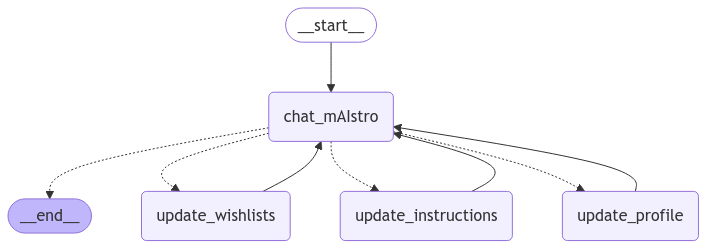

In [34]:
# Create the graph + all nodes
builder = StateGraph(MessagesState)

# Define the flow of the memory extraction process
builder.add_node(chat_mAIstro)
builder.add_node(update_wishlists)
builder.add_node(update_profile)
builder.add_node(update_instructions)
builder.add_edge(START, "chat_mAIstro")
builder.add_conditional_edges("chat_mAIstro", route_message)
builder.add_edge("update_wishlists", "chat_mAIstro")
builder.add_edge("update_profile", "chat_mAIstro")
builder.add_edge("update_instructions", "chat_mAIstro")

# Store for long-term (across-thread) memory
across_thread_memory = InMemoryStore()

# Checkpointer for short-term (within-thread) memory
within_thread_memory = MemorySaver()

# We compile the graph with the checkpointer and store
graph = builder.compile(checkpointer=within_thread_memory, store=across_thread_memory)

# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

# Test your graph
provide some basic detais

thread ID for short-term (within-thread) memory

user ID for long-term (across-thread) memory

In [36]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory
config = {"configurable": {"thread_id": "1", "user_id": "Khan"}}

# User input to create a profile memory
input_messages = [HumanMessage(content="My name is Khan. I live in Lahore with my family. I have 3 family memberat my house.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

My name is Khan. I live in Lahore with my family. I have 3 family memberat my house.
================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_PqHb1iiSy6M7RTg0OmLrXPXT)
 Call ID: call_PqHb1iiSy6M7RTg0OmLrXPXT
  Args:
    update_type: user
================================= Tool Message =================================

updated profile
================================== Ai Message ==================================

Got it, Khan! If there's anything you'd like to add to your WishList or if you have any specific preferences, feel free to let me know.


In [37]:
# User input for a ToDo
input_messages = [HumanMessage(content="My sister asked me to book swim lessons for her.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

My sister asked me to book swim lessons for her.
================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_amMzrEjFZ1TsfhRCH4z7GXyb)
 Call ID: call_amMzrEjFZ1TsfhRCH4z7GXyb
  Args:
    update_type: wishlist
================================= Tool Message =================================

New WishList created:
Content: {'task': 'Book swim lessons for sister', 'time_to_complete': 60, 'solutions': ['Check local swimming pools for lesson availability', 'Look for private swim instructors online', 'Consider group classes for better rates'], 'status': 'not started'}
================================== Ai Message ==================================

I've added "Book swim lessons for sister" to your WishList. If you need any help with this task or want to update it, just let me know!


In [38]:
# User input to update instructions for creating Wish Lists
input_messages = [HumanMessage(content="When creating or updating WishList items, include specific local businesses / vendors.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

When creating or updating WishList items, include specific local businesses / vendors.
================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_PmvG4gCi6osGe6Tw1xjhrvNT)
 Call ID: call_PmvG4gCi6osGe6Tw1xjhrvNT
  Args:
    update_type: instructions
================================= Tool Message =================================

updated instructions
================================== Ai Message ==================================

Got it! I'll make sure to include specific local businesses or vendors when creating or updating your WishList items. If there's anything else you'd like to adjust, just let me know!


In [39]:
# Check for updated instructions
user_id = "Khan"

# Search
for memory in across_thread_memory.search(("instructions", user_id)):
    print(memory.value)

{'memory': 'Based on your feedback, here are the updated instructions for managing your WishList items:\n\n1. **Task Description**: Clearly state the task or item to be added to the WishList.\n   \n2. **Local Recommendations**: Include specific local businesses or vendors relevant to the task. For example, if booking swim lessons, suggest local swimming pools or instructors in the area.\n\n3. **Time to Complete**: Estimate the time required to complete the task, if applicable.\n\n4. **Solutions/Options**: Provide a list of potential solutions or options to accomplish the task, including local options.\n\n5. **Status**: Track the status of the task (e.g., not started, in progress, completed).\n\nIf you have any more preferences or need further customization, feel free to let me know!'}


In [40]:
# User input for a WishList
input_messages = [HumanMessage(content="I need to fix the jammed electric Yale lock on the car door.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I need to fix the jammed electric Yale lock on the car door.
================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_3BPyvgi7nkVN5D5WH3L324Pp)
 Call ID: call_3BPyvgi7nkVN5D5WH3L324Pp
  Args:
    update_type: wishlist
================================= Tool Message =================================

New WishList created:
Content: {'task': 'Fix jammed electric Yale lock on car door', 'time_to_complete': 90, 'solutions': ['Contact local locksmiths specializing in car locks', 'Check for Yale service centers nearby', 'Look for DIY repair guides online'], 'status': 'not started'}

Document 1296a173-60c9-4efb-ae78-52bf4c3f17b6 updated:
Plan: Add specific local businesses or vendors to the solutions for booking swim lessons.
Added content: ['Check local swimming pools like Lahore Gymkhana or Punjab Club for lesson availability', 'Look for private swim instr

In [41]:
# Namespace for the memory to save
user_id = "Khan"

# Search
for memory in across_thread_memory.search(("wishlist", user_id)):
    print(memory.value)

{'task': 'Book swim lessons for sister', 'time_to_complete': 60, 'deadline': None, 'solutions': ['Check local swimming pools like Lahore Gymkhana or Punjab Club for lesson availability', 'Look for private swim instructors online through platforms like OLX or local Facebook groups', 'Consider group classes at community centers such as Model Town Club for better rates'], 'status': 'not started'}
{'task': 'Fix jammed electric Yale lock on car door', 'time_to_complete': 90, 'deadline': None, 'solutions': ['Contact local locksmiths specializing in car locks', 'Check for Yale service centers nearby', 'Look for DIY repair guides online'], 'status': 'not started'}


In [42]:
# User input to update an existing Wish List
input_messages = [HumanMessage(content="For the swim lessons, I need to get that done by end of March.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

For the swim lessons, I need to get that done by end of March.
================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_RfTWYFDynlkcD6Dtu12Xtyhx)
 Call ID: call_RfTWYFDynlkcD6Dtu12Xtyhx
  Args:
    update_type: wishlist
================================= Tool Message =================================

Document 1296a173-60c9-4efb-ae78-52bf4c3f17b6 updated:
Plan: Add a deadline to the task for booking swim lessons to ensure it is completed by the end of March.
Added content: 2025-03-31T23:59:59
================================== Ai Message ==================================

I've updated the swim lessons task with a deadline for the end of March. If there's anything else you'd like to adjust, just let me know!


We can see that Trustcall performs patching of the existing memory:

In [43]:
# User input for a Wish List
input_messages = [HumanMessage(content="Need to call back City Toyota to schedule car service.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Need to call back City Toyota to schedule car service.
================================== Ai Message ==================================
Tool Calls:
  UpdateMemory (call_HuBmumtOEgVCk3zCLMPg2VTw)
 Call ID: call_HuBmumtOEgVCk3zCLMPg2VTw
  Args:
    update_type: wishlist
================================= Tool Message =================================

New WishList created:
Content: {'task': 'Call back City Toyota to schedule car service', 'time_to_complete': 15, 'solutions': ['Find the contact number for City Toyota', 'Check available dates for service', 'Prepare any questions or concerns about the car service'], 'status': 'not started'}

Document fd85015d-4832-40c0-a30e-9ed18d1e6142 updated:
Plan: Add specific local businesses or vendors to the solutions for fixing the jammed electric Yale lock.
Added content: Contact local locksmiths like Lahore Lock Masters or City Lock Services specializing in car locks


In [44]:
# Namespace for the memory to save
user_id = "Khan"

# Search
for memory in across_thread_memory.search(("wishlist", user_id)):
    print(memory.value)

{'task': 'Book swim lessons for sister', 'time_to_complete': 60, 'deadline': '2025-03-31T23:59:59', 'solutions': ['Check local swimming pools like Lahore Gymkhana or Punjab Club for lesson availability', 'Look for private swim instructors online through platforms like OLX or local Facebook groups', 'Consider group classes at community centers such as Model Town Club for better rates'], 'status': 'not started'}
{'task': 'Fix jammed electric Yale lock on car door', 'time_to_complete': 90, 'deadline': None, 'solutions': ['Contact local locksmiths like Lahore Lock Masters or City Lock Services specializing in car locks', 'Check for Yale service centers nearby, such as the one in Gulberg', 'Look for DIY repair guides online, such as YouTube tutorials or auto repair forums'], 'status': 'not started'}
{'task': 'Call back City Toyota to schedule car service', 'time_to_complete': 15, 'deadline': None, 'solutions': ['Find the contact number for City Toyota', 'Check available dates for service', 

Now we can create a new thread.

This creates a new session.

Profile, WishList, and Instructions saved to long-term memory are accessed.

In [45]:
# We supply a thread ID for short-term (within-thread) memory
# We supply a user ID for long-term (across-thread) memory
config = {"configurable": {"thread_id": "2", "user_id": "Khan"}}

# Chat with the chatbot
input_messages = [HumanMessage(content="I have 30 minutes, what tasks can I get done?")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

I have 30 minutes, what tasks can I get done?
================================== Ai Message ==================================

Based on your available time, you can complete the following task from your WishList:

- **Call back City Toyota to schedule car service**: This task is estimated to take 15 minutes.

Would you like to proceed with this task, or do you need any assistance with it?


In [46]:
# Chat with the chatbot
input_messages = [HumanMessage(content="Yes, give me some options to call for swim lessons.")]

# Run the graph
for chunk in graph.stream({"messages": input_messages}, config, stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

Yes, give me some options to call for swim lessons.
================================== Ai Message ==================================

Here are some options for booking swim lessons in Lahore:

1. **Local Swimming Pools**:
   - Lahore Gymkhana: Check their availability for swim lessons.
   - Punjab Club: Inquire about their swim lesson schedules.

2. **Private Swim Instructors**:
   - Look for instructors on platforms like OLX or local Facebook groups where private lessons might be advertised.

3. **Community Centers**:
   - Model Town Club: They might offer group classes, which could be more cost-effective.

If you need more information or help with contacting any of these options, feel free to ask!
